# 붓꽃 데이터셋 분류

## 1.붓꽃 데이터셋 설명
- 데이터 크기 : 150개
- 클래스 : 3개의 품종
  - Setosa : 50개
  - Versicolor : 50개
  - Virginica : 50개
- 피처 : 4개
  - Sepal Length (cm): 꽃받침의 길이
  - Sepal Width (cm): 꽃받침의 너비
  - Petal Length (cm): 꽃잎의 길이
  - Petal Width (cm): 꽃잎의 너비

## 2.필요 라이브러리 임포트
- sklearn.tree.plot_tree : 결정 트리 모델을 시각화 하는데 사용

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

## 3.데이터 로드 및 확인

In [3]:
# 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# 데이터프레임으로 변환 (분석 및 시각화를 위해)
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

In [5]:
# 데이터셋 확인
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
# 데이터 내용 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# 데이터 통계량 확인
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 4.데이터 분할

In [8]:
# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 5.결정 트리 모델 학습

In [ ]:
# 결정 트리 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

## 6.예측

In [10]:
# 예측
y_pred = model.predict(X_test)
print(y_pred[:5])

[0 2 1 1 0]


## 7.성능 평가

In [12]:
# 성능 평가
# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9333


In [13]:
# 분류 보고서
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


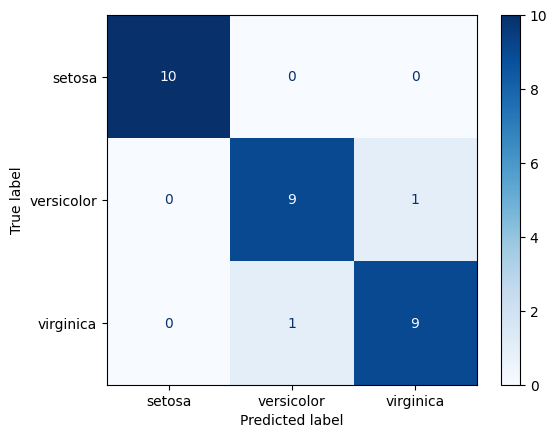

In [14]:
# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## 8.결정 트리 시각화

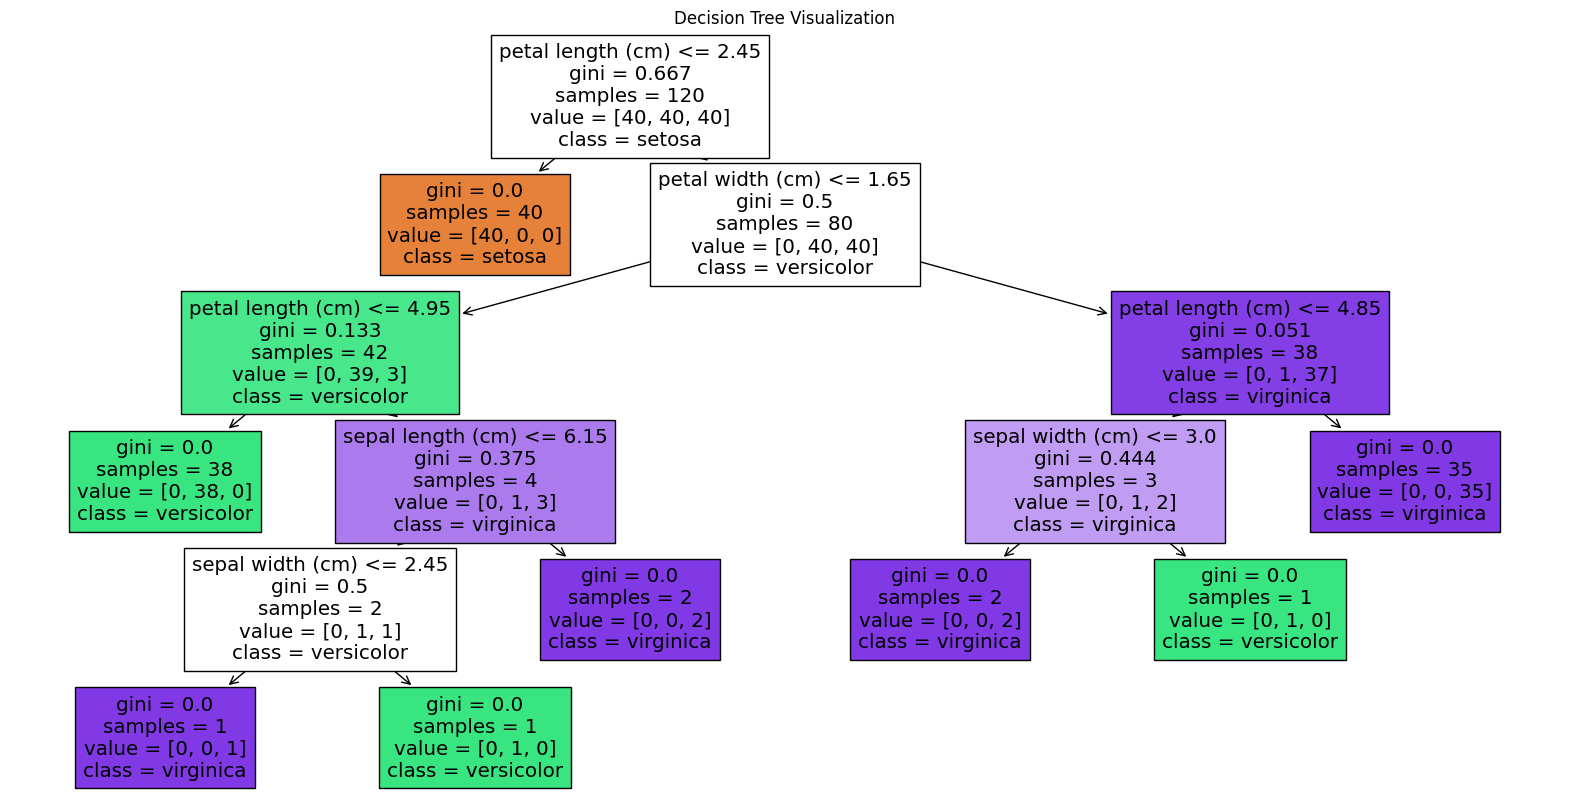

In [16]:
# 6. 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()

## 9.피처 중요도 확인

In [23]:
# 피처 중요도 계산 및 시각화
importances = model.feature_importances_
feature_names = iris.feature_names
print(importances)
print(feature_names)

[0.00625    0.02916667 0.5585683  0.40601504]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
# 피처 중요도 출력
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

sepal length (cm): 0.0062
sepal width (cm): 0.0292
petal length (cm): 0.5586
petal width (cm): 0.4060


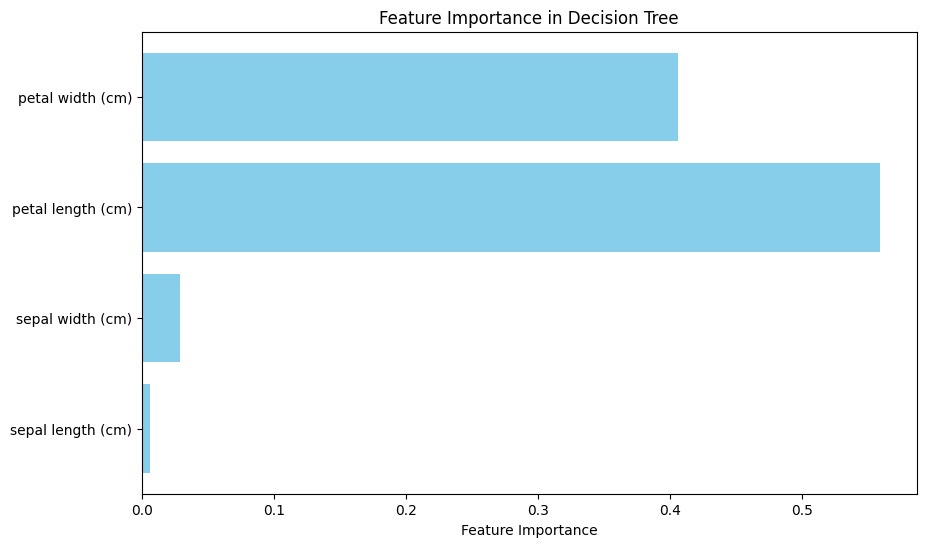

In [25]:
# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()
